# Tarea 5

## Ejercicio 1 
**Dibuje la frontera óptima para el proceso verdadero, dentro de muestra, y fuera de muestra.**

In [2]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [620]:
# Ejercicio 1
p=100
n=200

X = np.random.normal(0, 1,(n,p))
D = .4 * np.identity(n)
Z = D@X
# Matriz de covarianzas 
S = (np.transpose(Z) @ Z)/n

#vector de Mu
M = np.ones((p,1)) 

# Sigma, solo con 1 en diagonal
Sigma =np.identity(p)

#sobre donde valuaremos G
G = np.linspace(0,100, 10000)


In [621]:
# TRUE
M2 = np.transpose(M) @ np.linalg.inv(Sigma) @ M
Rtrue = np.transpose ( G**2 / M2)

In [622]:
# IN 
M3 = np.transpose(M) @ np.linalg.inv(S) @ M
Rin = np.transpose ( G**2 / M3) 


In [623]:
# OUT
M4 = (np.transpose(M) @ np.linalg.inv(S) @ M)**2
M5 = np.transpose(M)@ np.linalg.inv(S) @ Sigma @np.linalg.inv(S) @ M 
Rout = np.transpose ( (G**2) * M5 /M4)


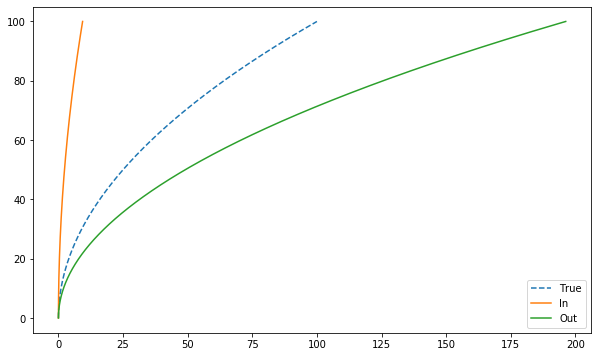

In [624]:
# grafica de las 3 lineas
plt.figure(figsize=(10, 6)) 
plt.plot( Rtrue, G, '--',label = "True")
plt.plot( Rin, G, label = "In")
plt.plot( Rout, G, label="Out")
plt.legend()


Responder las siguientes preguntas:
* **¿El comportamiento depende de $p,n$ ó $c=p/n$?**

Depende del cociente de $p$ y $n$, porque haciendo pruebas con diferentes valores, solo cambia cuando este cociente es muy grande o pequeño.


* **¿Cambia el comporatamiento de los resultados al variar el valor de $\sigma$?**

Al hacer varias pruebas, entre más grande sea el $\sigma$ se muestra mayor inclinación en las curvas, de in y true.

* **¿Cambia el comportamiento ante otra elección del valor del retorno esperado del portafolio?**

Sí, entre más grande sea el primedio, cambia la escala del eje x, en este caso se vuelve más pequeña, y para un promedio menor se vuelve más grande. 

Si consideramos que estamos modelando los retornos de un portafolio, todas estas variables afectaran en su comportamiento, desde cuantos valores tomamos, cómo están relacionados y como son instrumento a instrumento.

## Ejercicio 2

* Obtenga una muestra de variables financieras en el contexto de alta dimensionalidad

* Utilice el método propuesto en: *"Random matrix theory and financial correlations"* para limpiar la matriz de correlación y mejorar la frontera óptima dentro y fuera de muestra. En específico, implemente el metodología utilizada para generar la figura 2 que se muestra en el artículo.

* Explique sus resultados

In [625]:
# lectura base de datos
# esta base ya la tenía guardada es de rendimientos de activos de renta variable mexicana

db = pd.read_csv("base_tarea5v4.csv",index_col=0)

In [626]:
db

,X1_AC_.,X1_AEROMEX_.,X1_AGUA_.,X1_ALEATIC_.,X1_ALFA_A,X1_ALPEK_A,X1_ALSEA_.,X1_AMX_AA,X1_ARA_.,X1_ASUR_B,...,X1_RASSINI_CPO,X1_R_A,X1_SORIANA_B,X1_TLEVISA_A,X1_TRAXION_A,X1_URBI_.,X1_VESTA_.,X1_VITRO_A,X1_VOLAR_A,X1_WALMEX_.
X,,,,,,,,,,,,,,,,,,,,,
20160404,-0.012871,-0.011383,-0.011557,-0.021852,-0.017580,0.000000,-0.001691,0.002930,-0.009188,-0.007678,...,-0.009843,-0.004790,0.005185,0.003345,-0.005745,-0.005745,0.002312,0.002957,0.012298,-0.010534
20160405,-0.010583,0.007104,-0.003077,-0.026884,-0.012739,0.009171,0.004157,-0.010226,-0.001546,-0.004242,...,0.012354,-0.009113,-0.020879,-0.020837,-0.010332,-0.010331,-0.000769,-0.006242,0.009449,0.004113
20160406,0.006504,-0.001216,0.026852,0.007782,-0.022120,0.001091,0.018093,-0.005904,0.003096,0.005877,...,-0.001122,0.019014,-0.007777,-0.001490,0.002772,0.002772,-0.005002,0.001396,0.004012,-0.010120
20160407,-0.003826,0.005602,-0.008115,-0.032819,0.007226,-0.016703,0.000000,-0.008166,-0.009259,0.025802,...,-0.000843,-0.013893,-0.003793,-0.007459,0.006293,0.006293,0.008894,-0.002614,0.001332,-0.004869
20160408,-0.001536,0.002180,0.001212,0.009980,0.011853,0.016617,-0.007530,0.011976,-0.006231,-0.000153,...,0.005481,0.017174,0.013706,-0.019540,0.009176,0.009176,0.008816,-0.009434,-0.008513,-0.016145
20160411,-0.007437,-0.000725,0.010291,0.028854,-0.017263,-0.003632,0.016540,-0.014053,-0.029781,-0.014643,...,-0.001398,0.008189,-0.011768,0.006569,-0.007066,-0.007066,-0.000760,0.013757,-0.026563,0.010194
20160412,0.005598,-0.004353,0.018574,0.075298,0.005019,0.031717,-0.009852,0.021005,0.103393,-0.001668,...,0.000420,0.000401,-0.004814,-0.003374,0.004491,0.004491,-0.007224,0.011134,0.003859,0.004184
20160413,0.003854,-0.006801,0.007059,0.020722,-0.000624,0.016608,0.010855,0.008817,-0.007321,0.006063,...,0.006856,0.018244,-0.001782,0.006333,0.003891,0.003891,0.011107,-0.007571,0.009885,0.011029
20160414,-0.001621,-0.009782,0.041180,-0.036052,0.013741,0.007994,0.006562,-0.005098,-0.005900,-0.002009,...,0.002501,0.019590,0.018363,-0.002822,0.001215,0.001215,0.035991,0.002601,0.016857,0.006061


In [627]:
# dividiremos nuestros rendimientos a la mitad unos serán utilizados como valores reales
n1 = int(db.shape[0]/2)
p = db.shape[1]
X1 = db[:n1]
X2 = db[n1:]

In [628]:
#matrices de covarianza
S1 = np.transpose(X1) @X1/n1
S2 = np.transpose(X2) @X2/n1
#mu1 = np.mean(X1,0)
mu1 = np.ones(p)
mu2 = np.mean(X2,0)
G1 = np.linspace(0,1, 10000)

In [633]:
# obtenemos lambda y O
l1, O1 = np.linalg.eig(S1)
#los primeros eigenvalores si los da ordenados 
#tomaremos los primeros 8, los demás los haremos constantes
k=8
#¿que valor le asginaremos a los demás?

#para asegurarnos que la traza sume 1 
saux = 1 - sum(l1[:k])
saux = saux/(p-k)

#le asignamos los valores a partir del valor 9
l1[k:]=saux 

#construimos la matriz diagonal para hacerla limpia
lambda1 = np.diag(l1)

#nuestra nueva matriz de correlaciones seria
C1 = O1 @lambda1@np.transpose(O1)

In [634]:
np.matrix.trace(C1)

1.0

In [635]:
# obtenemos lambda y O para el OUT
#seguimos el mismo procedimiento que antes
l2, O2 = np.linalg.eig(S2)
saux2 = 1 - sum(l2[:k])
saux2 = saux2/(p-k)
l2[k:]=saux2 
lambda2 = np.diag(l2)
C2 = O2 @lambda2@np.transpose(O2)

In [636]:
np.matrix.trace(C2)

1.0000000000000002

In [637]:
#IN dirty
aux1 = np.transpose(mu1) @ np.linalg.inv(S1) @ mu1
Rin_dirty = np.transpose ( G1**2 / aux1) 

In [638]:
#IN clean
aux2 = np.transpose(mu1) @ np.linalg.inv(C1) @ mu1
Rin_clean = np.transpose ( G1**2 / aux2) 


In [639]:
# OUT dirty
aux3 = (np.transpose(mu1) @ np.linalg.inv(S1) @ mu1)**2
aux4 = np.transpose(mu1)@ np.linalg.inv(S1) @ S2 @np.linalg.inv(S1) @ mu1 
Rout_dirty = np.transpose ( (G1**2) * aux4 /aux3)

In [640]:
# OUT clean
aux5 = (np.transpose(mu1) @ np.linalg.inv(C1) @ mu1)**2
aux6 = np.transpose(mu1)@ np.linalg.inv(C1) @ C2 @np.linalg.inv(C1) @ mu1 
Rout_clean = np.transpose ( (G1**2) * aux6 /aux5)

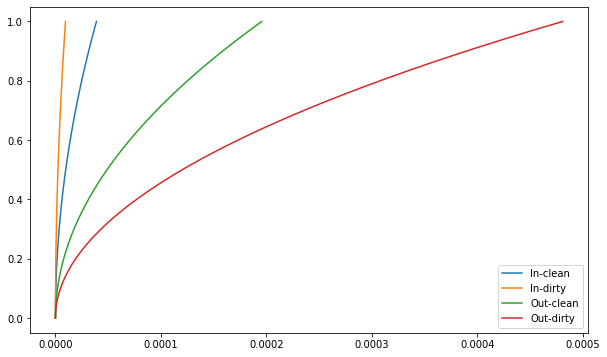

In [641]:
plt.figure(figsize=(10, 6)) 
plt.plot( Rin_clean, G1, label = "In-clean")
plt.plot( Rin_dirty, G1, label = "In-dirty")
plt.plot( Rout_clean, G1, label = "Out-clean")
plt.plot( Rout_dirty, G1, label = "Out-dirty")
plt.legend()


Realizando la misma metodología, pudimos replicar resultados similares a los que aparecen en el artículo.

Cabe mencionar que la elección de activos y de periodicidad así como la proporción $c=p/n$ son variables de suma importancia, porque cualquier alteración en alguna de ellas hace que se presenten resultados muy distintos.

Para este trabajo en particular, estoy tratando datos de Abril 2016 - Junio 2017, si tomaba otra ventana de tiempo ya no cumplía con los resultados esperados o requeridos, debido a la variabilidad que presentaban los activos en ese periodo (cabe mencionar que son instrumentos de renta variable, los cuales son los menos estables en el mercado mexicano)